# Final Report for Capstone Project for Ryerson CKME136
#### Peng

### Step 0: Prepare Environment

In [1]:
#Opening the requires packages
exec(open("../Scripts/Packages.py").read())
%matplotlib inline
np.seterr(invalid='ignore')

#Set the Alpha value for the analysis
alpha_value = 0.001

#Set Target Variable
target = 'salary'
n_clusters=5

#Variables
PCAvar = 10

### Step 1: Data Collection

In [2]:
#Import the Data Files
exec(open("../Scripts/Data_Import.py").read())

### Step 2: Preliminary Data Cleaning/Structuring

In [3]:
#Mapping together the files and calculating fields
exec(open("../Scripts/Data_Cleaning.py").read())

In [4]:
#We don't really need player ID
Data = Data.drop(['playerID'], axis=1)

### Step 3: Exploratory Data Analysis

#### Testing String Variables

In [5]:
#League
testing = 'lgID'
independent = True

Test = Data.loc[:, [testing, target]]
Test = Test.pivot(columns=testing, values=target)

exec(open("../Scripts/Data_Testing/Statistical_Tests.py").read())

if Sig == False:
    Data = Data.drop([testing], axis=1)

Comparing Standard Deviations

T-statistic: 332.856050555
P-Value: 2.29479411412e-74
  
Reject NULL hypothesis - Significant differences exist between the standard deviations of the groups.


Checking for Normality

P-value: 2.18842026307e-10
  
Reject NULL hypothesis - Not normal distribution


ANOVA Testing

Can one use ANOVA?
  
Independent:  True
Normal:  False
StdDevEq:  False
  
The assumptions to use ANOVA have not been met.

Kruskal-Wallis Testing

H-statistic: 0.0218517342146
P-Value: 0.882482204082

Accept NULL hypothesis - No significant difference between groups.


In [6]:
#Throws
testing = 'throws'
independent = True

Test = Data.loc[:, [testing, target]]
Test = Test.pivot(columns=testing, values=target)

exec(open("../Scripts/Data_Testing/Statistical_Tests.py").read())

if Sig == False:
    Data = Data.drop([testing], axis=1)

Comparing Standard Deviations

T-statistic: 380.495489492
P-Value: 9.70701228559e-85
  
Reject NULL hypothesis - Significant differences exist between the standard deviations of the groups.


Checking for Normality

P-value: 2.18842026307e-10
  
Reject NULL hypothesis - Not normal distribution


ANOVA Testing

Can one use ANOVA?
  
Independent:  True
Normal:  False
StdDevEq:  False
  
The assumptions to use ANOVA have not been met.

Kruskal-Wallis Testing

H-statistic: 20.6653623195
P-Value: 5.46965620541e-06

Reject NULL hypothesis - Significant differences exist between groups.


In [7]:
#Bats
testing = 'bats'
independent = True

Test = Data.loc[:, [testing, target]]
Test = Test.pivot(columns=testing, values=target)

exec(open("../Scripts/Data_Testing/Statistical_Tests.py").read())

if Sig == False:
    Data = Data.drop([testing], axis=1)

Comparing Standard Deviations

T-statistic: 942.933426624
P-Value: 1.75633763456e-205
  
Reject NULL hypothesis - Significant differences exist between the standard deviations of the groups.


Checking for Normality

P-value: 2.18842026307e-10
  
Reject NULL hypothesis - Not normal distribution


ANOVA Testing

Can one use ANOVA?
  
Independent:  True
Normal:  False
StdDevEq:  False
  
The assumptions to use ANOVA have not been met.

Kruskal-Wallis Testing

H-statistic: 51.5910017287
P-Value: 6.26839443946e-12

Reject NULL hypothesis - Significant differences exist between groups.


In [8]:
#Team
testing = 'teamID'
independent = True

Test = Data.loc[:, [testing, target]]
Test = Test.pivot(columns=testing, values=target)

exec(open("../Scripts/Data_Testing/Statistical_Tests.py").read())

if Sig == False:
    Data = Data.drop([testing], axis=1)
else:     
    Test = Test.replace(np.nan, 0)
    kmeans = KMeans(n_clusters, random_state=0).fit(Test)
    Data[testing+' - Clusters'] = pd.Series(kmeans.labels_, index=Test.index)
    Data = Data.drop([testing], axis=1)

Comparing Standard Deviations

T-statistic: 190357.242078
P-Value: 0.0
  
Reject NULL hypothesis - Significant differences exist between the standard deviations of the groups.


Checking for Normality

P-value: 2.18842026307e-10
  
Reject NULL hypothesis - Not normal distribution


ANOVA Testing

Can one use ANOVA?
  
Independent:  True
Normal:  False
StdDevEq:  False
  
The assumptions to use ANOVA have not been met.

Kruskal-Wallis Testing

H-statistic: 807.138415208
P-Value: 1.32957113226e-147

Reject NULL hypothesis - Significant differences exist between groups.


In [9]:
#birthCountry
testing = 'birthCountry'
independent = True

Test = Data.loc[:, [testing, target]]
Test = Test.pivot(columns=testing, values=target)

exec(open("../Scripts/Data_Testing/Statistical_Tests.py").read())

if Sig == False:
    Data = Data.drop([testing], axis=1)
else:     
    Test = Test.replace(np.nan, 0)
    kmeans = KMeans(n_clusters=5, random_state=0).fit(Test)
    Data = Data.drop([testing], axis=1)
    Data[testing+' - Clusters'] = pd.Series(kmeans.labels_, index=Test.index)

Comparing Standard Deviations

T-statistic: inf
P-Value: 0.0
  
Reject NULL hypothesis - Significant differences exist between the standard deviations of the groups.


Checking for Normality

P-value: 2.18842026307e-10
  
Reject NULL hypothesis - Not normal distribution


ANOVA Testing

Can one use ANOVA?
  
Independent:  True
Normal:  False
StdDevEq:  False
  
The assumptions to use ANOVA have not been met.

Kruskal-Wallis Testing



/Users/Margaret/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1855: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


H-statistic: 262.227417225
P-Value: 2.06202390401e-41

Reject NULL hypothesis - Significant differences exist between groups.


### Step 4: Secondary Data Cleaning

In [10]:
#Select what variables to dummy 
To_Dummy = Data.filter(regex='Clusters', axis=1)
To_Dummy = To_Dummy.astype(str)

#Dummy = Data.loc[:, To_Dummy]
Dummy = pd.get_dummies(To_Dummy, prefix=None, prefix_sep=' - ')

#Drops those columns and put the dummy variables back in place
Data = Data.drop(To_Dummy.columns, axis=1)
Data = pd.concat([Data, Dummy], axis=1, join='inner')


In [11]:
#Check the string variables
print(list(Data.select_dtypes(include=['O']).columns))

#Select what variables to dummy 
To_Dummy = list(Data.select_dtypes(include=['O']).columns)

#Dummy the Variables
exec(open("../Scripts/Dummy_Strings.py").read())

['bats', 'throws']


### Step 5: Correlation Analysis

In [12]:
#Conduct Principal Component Analysis
#exec(open("../Scripts/PCA.py").read())

                                  Rho         PValue
salary                       1.000000   0.000000e+00
yearsPlayed                  0.612581   0.000000e+00
age                          0.514736   0.000000e+00
birthCountry - Clusters - 0  0.475234   0.000000e+00
yearID                       0.456065   0.000000e+00
Games                        0.294453   0.000000e+00
birthCountry - Clusters - 3  0.271533  6.140448e-298
OPS                          0.270421  2.001697e-295
weight                       0.242189  1.365486e-235
birthCountry - Clusters - 4  0.171889  6.417686e-118
teamID - Clusters - 1        0.123566   2.038896e-61
teamID - Clusters - 3        0.123246   4.163239e-61
birthCountry - Clusters - 2  0.117089   2.726397e-55
DH                           0.113393   6.042158e-52
teamID - Clusters - 4        0.104933   1.066594e-44
height                       0.091940   1.128526e-34
teamID - Clusters - 2        0.086617   5.965066e-31
bats - L                     0.053249   1.2172

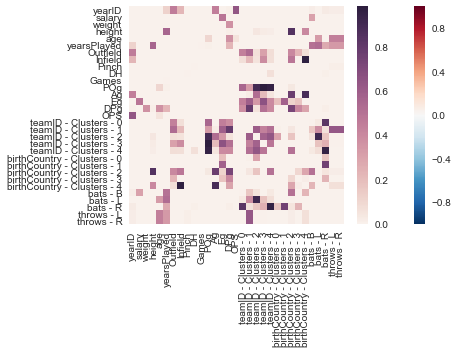

In [13]:
#Correlated the values, and strips out any variables that are below the Alpha value
exec(open("../Scripts/Correlation.py").read())

Axes(0.125,0.125;0.62x0.755)


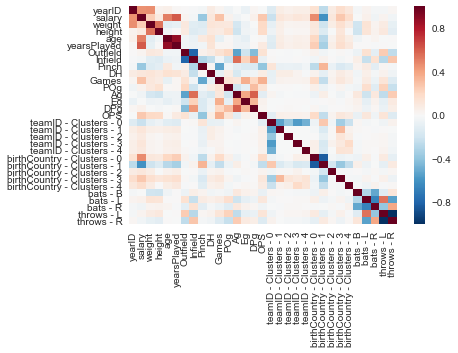

In [14]:
print(sns.heatmap(pd.DataFrame(Rho), xticklabels=list(Data), yticklabels=list(Data)))

Axes(0.125,0.125;0.62x0.755)


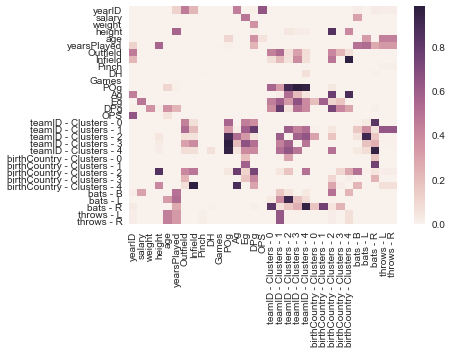

In [15]:
print(sns.heatmap(pd.DataFrame(Pval), xticklabels=list(Data), yticklabels=list(Data)))

### Step 6: Regression Analysis

In [16]:
#Spilt the Data into Training and Testing Sets (50% in each set)
exec(open("../Scripts/SplitToTrainTest.py").read())

#Create and apply linear regression model
exec(open("../Scripts/LinReg.py").read())


Explained Variance: 0.70
r^2: 0.70
Mean squared error: 575335872869.98
                             Coefficient        Abs
birthCountry - Clusters - 1   -5898099.1  5898099.1
birthCountry - Clusters - 3    4200126.3  4200126.3
birthCountry - Clusters - 4    2977444.2  2977444.2
birthCountry - Clusters - 0   -2882840.2  2882840.2
teamID - Clusters - 0         -2846529.1  2846529.1
Pinch                         -2356456.6  2356456.6
teamID - Clusters - 1          2229623.5  2229623.5
birthCountry - Clusters - 2    1603368.8  1603368.8
teamID - Clusters - 2          1478877.8  1478877.8
Infield                       -1439636.0  1439636.0
Outfield                      -1198605.6  1198605.6
DH                            -1009695.8  1009695.8
teamID - Clusters - 3          -676202.8   676202.8
OPS                             480206.7   480206.7
teamID - Clusters - 4          -185769.3   185769.3
throws - R                      131815.4   131815.4
throws - L                     -131815.4   13